# Importing Necessary Libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Loading Data :

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Observation: Here, we can see the data is in categorical formate.

In [3]:
df.shape

(614, 13)

In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# EDA Process

In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Data Cleaning Process:

In [8]:
df = df.dropna()

In [9]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Label Encoder:

In [10]:
df.replace({'Loan_Status':{'N':0, 'Y':1}}, inplace = True)

Observation: Here, we use pandas replace method to change categorical value into integer.

In [11]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [12]:
df['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [13]:
df = df.replace(to_replace = '3+', value = 4)

Observation: Here, we changed '3+' row intp '4'.

In [14]:
df['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

# Data Visualization:

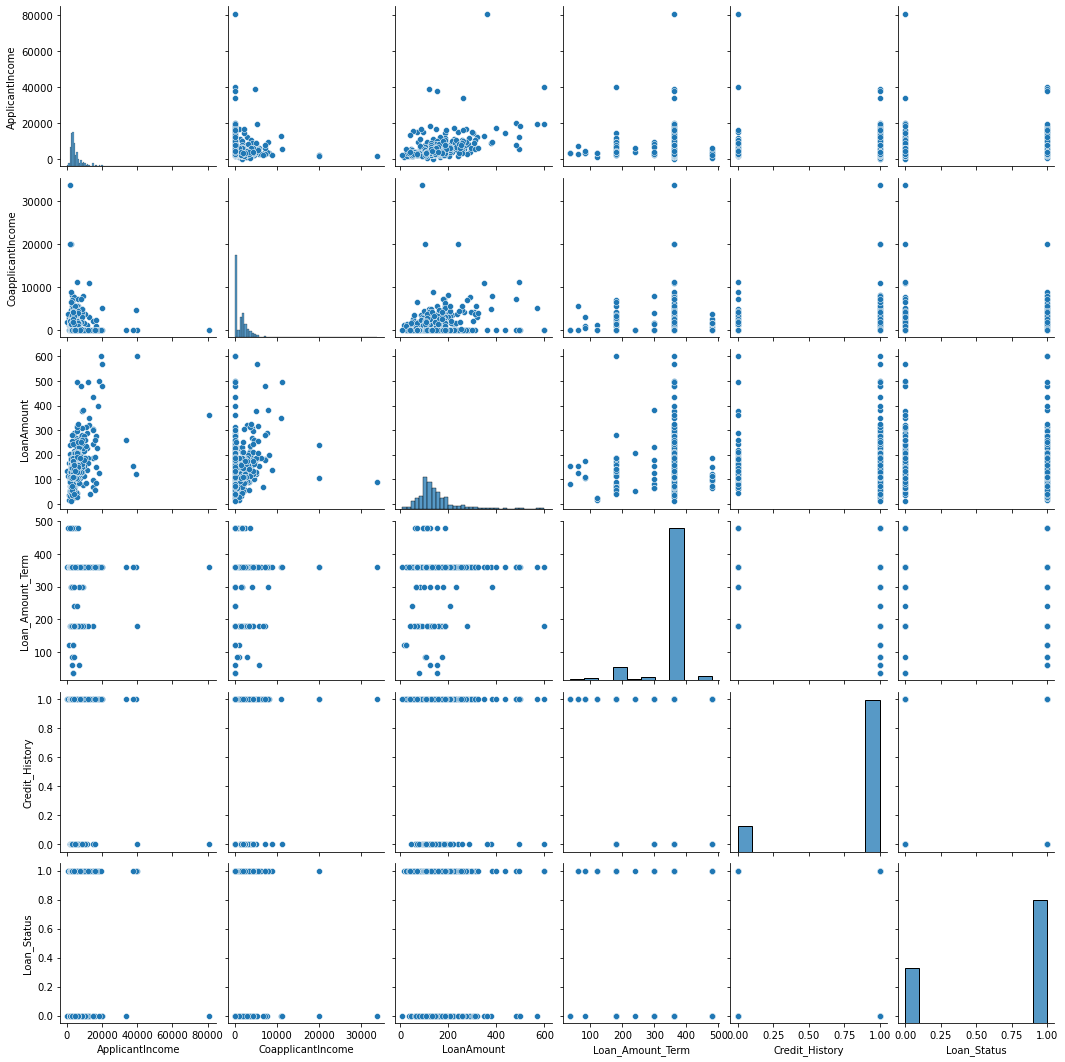

In [15]:
sns.pairplot(df)

In [16]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
ApplicantIncome,1.000000,-0.112588,0.495310,-0.010838,-0.056152,-0.043152
CoapplicantIncome,-0.112588,1.000000,0.190740,-0.005775,-0.008692,-0.049020
LoanAmount,0.495310,0.190740,1.000000,0.050867,-0.040773,-0.071753
Loan_Amount_Term,-0.010838,-0.005775,0.050867,1.000000,0.032937,-0.007798
Credit_History,-0.056152,-0.008692,-0.040773,0.032937,1.000000,0.529390
Loan_Status,-0.043152,-0.049020,-0.071753,-0.007798,0.529390,1.000000


<AxesSubplot:>

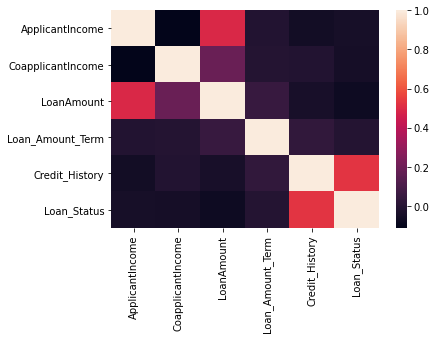

In [17]:
sns.heatmap(df.corr())

<AxesSubplot:xlabel='Education', ylabel='count'>

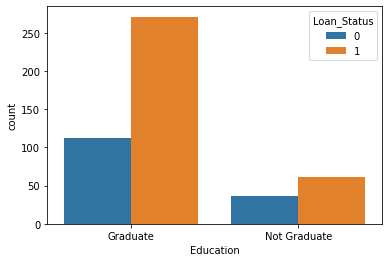

In [18]:
sns.countplot(x = 'Education', hue = 'Loan_Status', data = df)

<AxesSubplot:xlabel='Married', ylabel='count'>

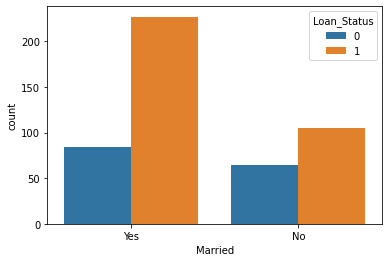

In [19]:
sns.countplot(x = 'Married', hue = 'Loan_Status', data = df)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

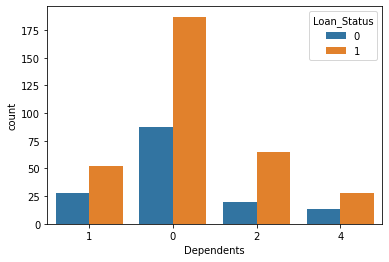

In [20]:
sns.countplot(x = 'Dependents', hue = 'Loan_Status', data = df)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

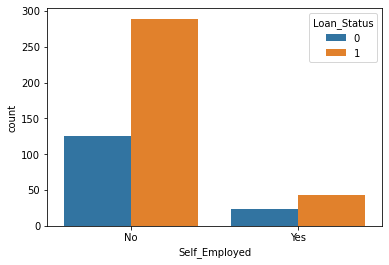

In [21]:
sns.countplot(x = 'Self_Employed', hue = 'Loan_Status', data = df)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='count'>

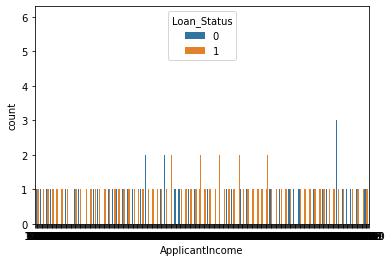

In [22]:
sns.countplot(x = 'ApplicantIncome', hue = 'Loan_Status', data = df)

<AxesSubplot:xlabel='LoanAmount', ylabel='count'>

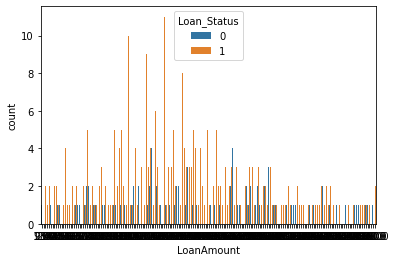

In [23]:
sns.countplot(x = 'LoanAmount', hue = 'Loan_Status', data = df)

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

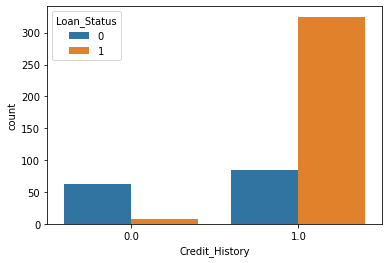

In [24]:
sns.countplot(x = 'Credit_History', hue = 'Loan_Status', data = df)

In [25]:
df.skew()

Dependents           1.386179
ApplicantIncome      6.917027
CoapplicantIncome    5.881622
LoanAmount           2.361437
Loan_Amount_Term    -2.333710
Credit_History      -2.013253
Loan_Status         -0.832681
dtype: float64

<AxesSubplot:xlabel='Dependents', ylabel='Density'>

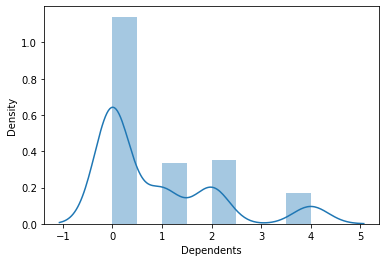

In [26]:
sns.distplot(df['Dependents'])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

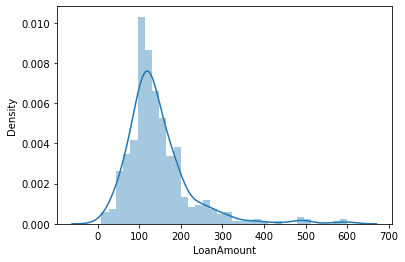

In [29]:
sns.distplot(df['LoanAmount'])

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

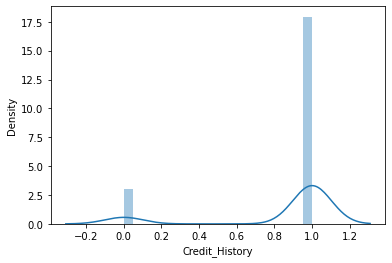

In [30]:
sns.distplot(df['Credit_History'])

<AxesSubplot:xlabel='Loan_Status', ylabel='Density'>

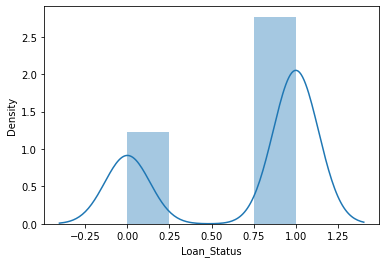

In [31]:
sns.distplot(df['Loan_Status'])

# Convert Categorical Columns to numerical value

In [32]:
df.replace({'Married':{'No':0, 'Yes':1},'Gender':{'Male':0, 'Female':1},'Self_Employed':{'No':0,'Yes':1},
                                        'Property_Area':{'Rural':0,'Semiurban':1, 'Urban':2},
                                         'Education':{'Graduate':1, 'Not Graduate':0}},inplace = True)

Observation: Here, we use pandas replace method to change categorical value into integer.

In [33]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


# Finding Outliers:

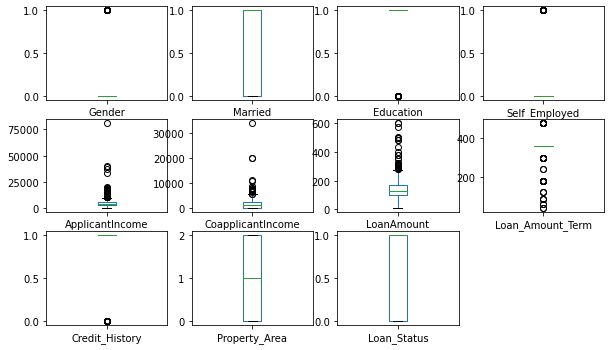

In [34]:
df.plot(kind = 'box', subplots = True, layout = (5,4), figsize = (10,10))
plt.show()

# Seprate Target and Independent Variable:

In [35]:
x = df.drop(columns =[ 'Loan_ID', 'Loan_Status'], axis = 1)
y = df['Loan_Status']

In [36]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2
5,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,2900,0.0,71.0,360.0,1.0,0
610,0,1,4,1,0,4106,0.0,40.0,180.0,1.0,0
611,0,1,1,1,0,8072,240.0,253.0,360.0,1.0,2
612,0,1,2,1,0,7583,0.0,187.0,360.0,1.0,2


In [37]:
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

# Train & Test Data:

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, stratify = y, random_state = 34)

In [39]:
print(x.shape, x_train.shape, x_test.shape)

(480, 11) (384, 11) (96, 11)


# Traing The Model: SVC

In [40]:
classifier = svm.SVC(kernel = 'linear')

In [41]:
classifier.fit(x_train, y_train)

SVC(kernel='linear')

# Model Evaluation:

In [42]:
x_train_predict = classifier.predict(x_train)
training_data_accu = accuracy_score(x_train_predict, y_train)

In [43]:
print('Accuracy on training data :', training_data_accu)

Accuracy on training data : 0.7473958333333334


In [44]:
x_test_predict = classifier.predict(x_test)
test_data_accu = accuracy_score(x_test_predict, y_test)

In [45]:
print('Accuracy on test data :', test_data_accu)

Accuracy on test data : 0.75
